In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(130298)

In [2]:
%pwd

'/Users/annachiararossi/Documents/Healthcare data/project_local'

In [3]:
data = pd.read_csv('dat.csv')
data.drop(columns = ['Unnamed: 0'], inplace = True)
data.set_index('inpatient.number', inplace = True)
data.head()

,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,pulse,respiration,...,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,
857781,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Male,36.7,87,19,...,37.0,97.0,93.0,95.9,17.8,1.14,125.0,15,11,"(69,79]"
743087,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,36.8,95,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,8,"(69,79]"
866418,Home,Cardiology,NonEmergency,farmer,Cardiology,2,Male,36.5,98,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,5,"(59,69]"
775928,Home,Cardiology,Emergency,UrbanResident,Cardiology,1,Male,36.0,73,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,11,"(69,79]"
810128,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,35.0,88,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,5,"(69,79]"


## Remove patients who died before leaving the hospital
For sure we don't need in the prediction of the outcome of readmission at 6 months patients who died before leaving the hospital in the first place.

In [4]:
data['DestinationDischarge'].value_counts()

Home                  1344
HealthcareFacility     438
Unknown                212
Died                    14
Name: DestinationDischarge, dtype: int64

In [5]:
data['outcome.during.hospitalization'].value_counts()

Alive                    1890
DischargeAgainstOrder     107
Dead                       11
Name: outcome.during.hospitalization, dtype: int64

In [6]:
dead_patients_id_1 = list(data.index[data['DestinationDischarge'] == 'Died'])
dead_patients_id_2 = list(data.index[data['outcome.during.hospitalization'] == 'Dead'])

def union(lst1, lst2):
    final_list = list(set(lst1) | set(lst2))
    return final_list

dead_patients_id = union(dead_patients_id_1, dead_patients_id_2)

In [7]:
data.loc[dead_patients_id][['eye.opening','movement','verbal.response','GCS']]

,eye.opening,movement,verbal.response,GCS
inpatient.number,,,,
828678,2,5,4,11
834443,1,1,1,3
868748,4,6,5,15
768336,4,6,5,15
728787,3,6,4,13
869467,4,6,5,15
765343,1,1,1,3
773090,4,6,5,15
753570,4,6,5,15


We notice that 5 of these patients died before leaving the hospital were in a coma and had very severe conditions (see eye.opening and the other characteristics above).
Moreover most of the patients were very responding but died anyway.

In [8]:
data.drop(dead_patients_id, inplace = True)

## Verify if the variable with unbalanced category are unbalanced also in the outcome

Take the name of all the categorical and binary variables.

In [9]:
cat_columns = ['DestinationDischarge','admission.ward','admission.way','occupation','discharge.department',
                       'type.of.heart.failure', 'NYHA.cardiac.function.classification', 'Killip.grade',
                       'consciousness', 'outcome.during.hospitalization','ageCat','visit.times', 'CCI.score', 
                       'eye.opening','verbal.response', 'movement', 'GCS', 'gender', 'myocardial.infarction', 
                       'congestive.heart.failure', 'peripheral.vascular.disease', 'cerebrovascular.disease', 
                       'dementia', 'Chronic.obstructive.pulmonary.disease', 'peptic.ulcer.disease', 'diabetes', 
                       'moderate.to.severe.chronic.kidney.disease', 'solid.tumor', 'liver.disease', 
                       'type.II.respiratory.failure', 'oxygen.inhalation', 'death.within.28.days', 
                       're.admission.within.28.days', 'death.within.3.months','re.admission.within.3.months', 
                       'death.within.6.months', 're.admission.within.6.months',
                        'return.to.emergency.department.within.6.months','respiratory.support.']

For each of the previous variables, verify if one category of the variables have more than 80% of the total values of the variables.

In [10]:
unbalanced_cols=[]
for col_name in cat_columns:
    max_value = (data[col_name].value_counts()/data.shape[0]).max()
    if max_value>0.8 and col_name!= "death.within.28.days" and col_name!= "re.admission.within.28.days" and col_name!= "death.within.3.months"and col_name!= "death.within.6.months":
        print(col_name,': ',max_value)
        unbalanced_cols.append(col_name)

occupation :  0.8318273092369478
discharge.department :  0.8493975903614458
consciousness :  0.9859437751004017
outcome.during.hospitalization :  0.946285140562249
visit.times :  0.9267068273092369
eye.opening :  0.982429718875502
verbal.response :  0.981425702811245
movement :  0.9789156626506024
GCS :  0.9754016064257028
myocardial.infarction :  0.9292168674698795
congestive.heart.failure :  0.9322289156626506
peripheral.vascular.disease :  0.9497991967871486
cerebrovascular.disease :  0.9252008032128514
dementia :  0.9422690763052208
Chronic.obstructive.pulmonary.disease :  0.8845381526104418
peptic.ulcer.disease :  0.9764056224899599
solid.tumor :  0.9809236947791165
liver.disease :  0.9583333333333334
type.II.respiratory.failure :  0.9447791164658634
oxygen.inhalation :  0.9447791164658634
respiratory.support. :  0.9809236947791165


Analyze the distribution of 0s and 1s in the outcome variable: re.admission.within.6.months

In [11]:
outcome_name="re.admission.within.6.months"
number_1=len(data[data[outcome_name]==1])
number_0=len(data[data[outcome_name]==0])
print(number_1/(len(data)))

0.38805220883534136


The percentage of the re admission is 38.49%

Now, for each of the variables with more of 80% of unbalance, we want to see whether their values are equally distributed among the two groups defined by the outcome "Readmitted within 6 months". If a variable has a category which strongly follows the target (e.g., that category is always present when target = 1, i.e. ~100% of the cases of the category coincide with an outcome = 1, or viceversa) then it might be significant in the final study, even if it is highly unbalanced. We will store in a list all variables whose categories are equally distributed among the outcome groups.

In [12]:
balanced_in_outcome = []

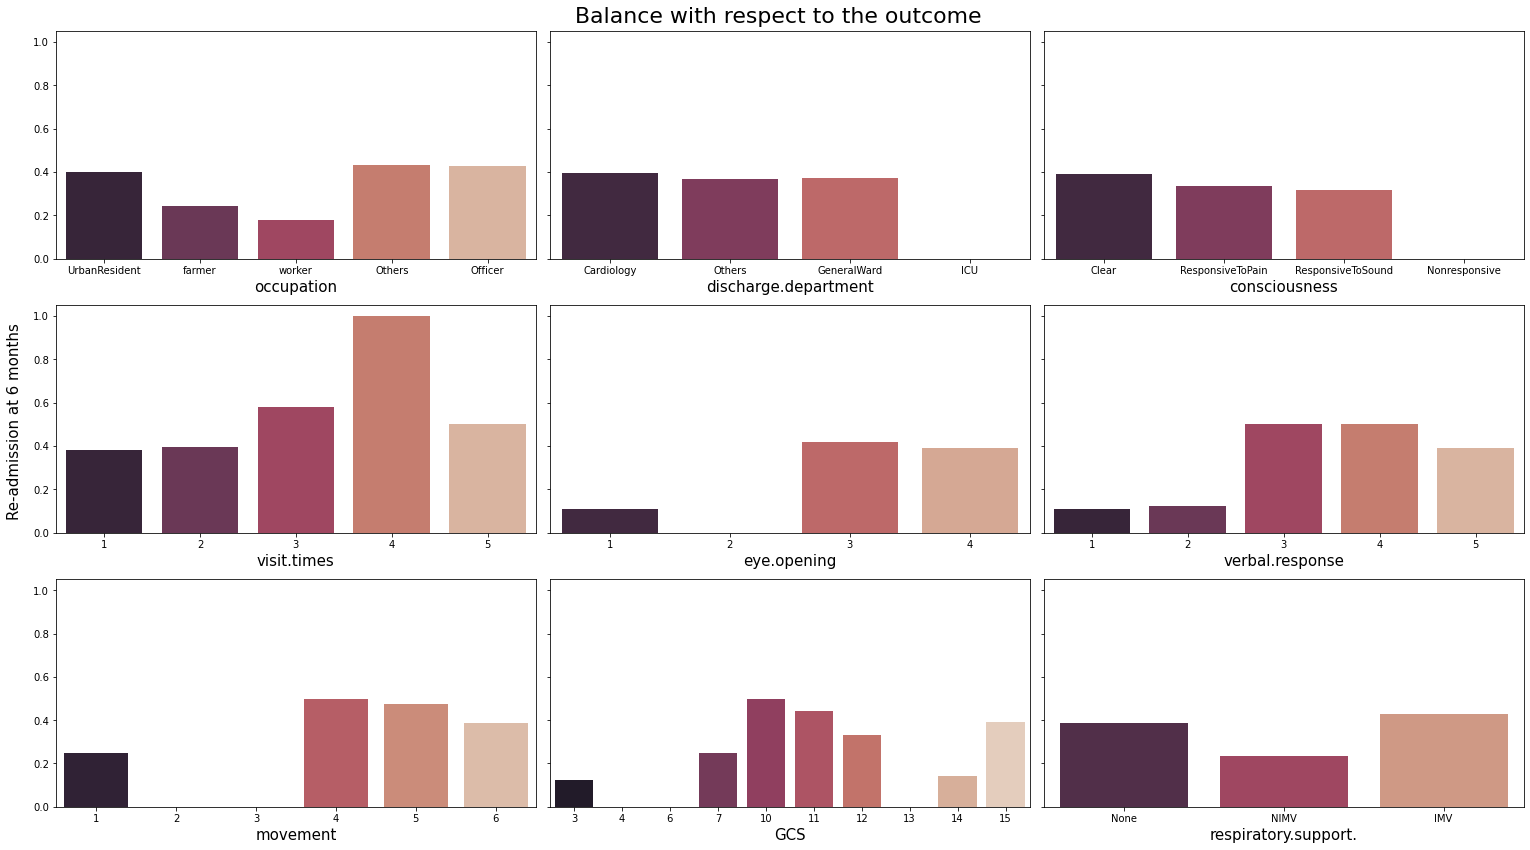

In [13]:
group1 = ['occupation', 'discharge.department', 'consciousness','visit.times', 'eye.opening', 
          'verbal.response','movement', 'GCS', 'respiratory.support.']

fig, axes = plt.subplots(3,3,sharey=True, figsize=(21,12))
fig.text(-0.01, 0.5, 'Re-admission at 6 months', va='center', rotation='vertical', size = 15)
fig.suptitle('Balance with respect to the outcome', size = 22)

idx = 0
i = 0
for column_name in group1:
    
    sns.barplot(ax=axes[i,idx], x=column_name, y= outcome_name,
                data=data, saturation=.5, ci=None, palette='rocket')
    axes[i,idx].set_ylabel('')
    axes[i,idx].set_xlabel(column_name, size = 15)
    idx += 1
    if idx == 3:
        idx = 0
        i += 1

fig.tight_layout()
plt.show()

From this, we can see that some of the variables like 'eye.opening', 'verbal.response', 'movement', 'GCS', 'discharge department','consciousness' have some categories which are never present when the outcome is. For this reason, we will keep them for the models we will develop.

In [15]:
balanced_in_outcome.extend(['occupation','visit.times','respiratory.support'])

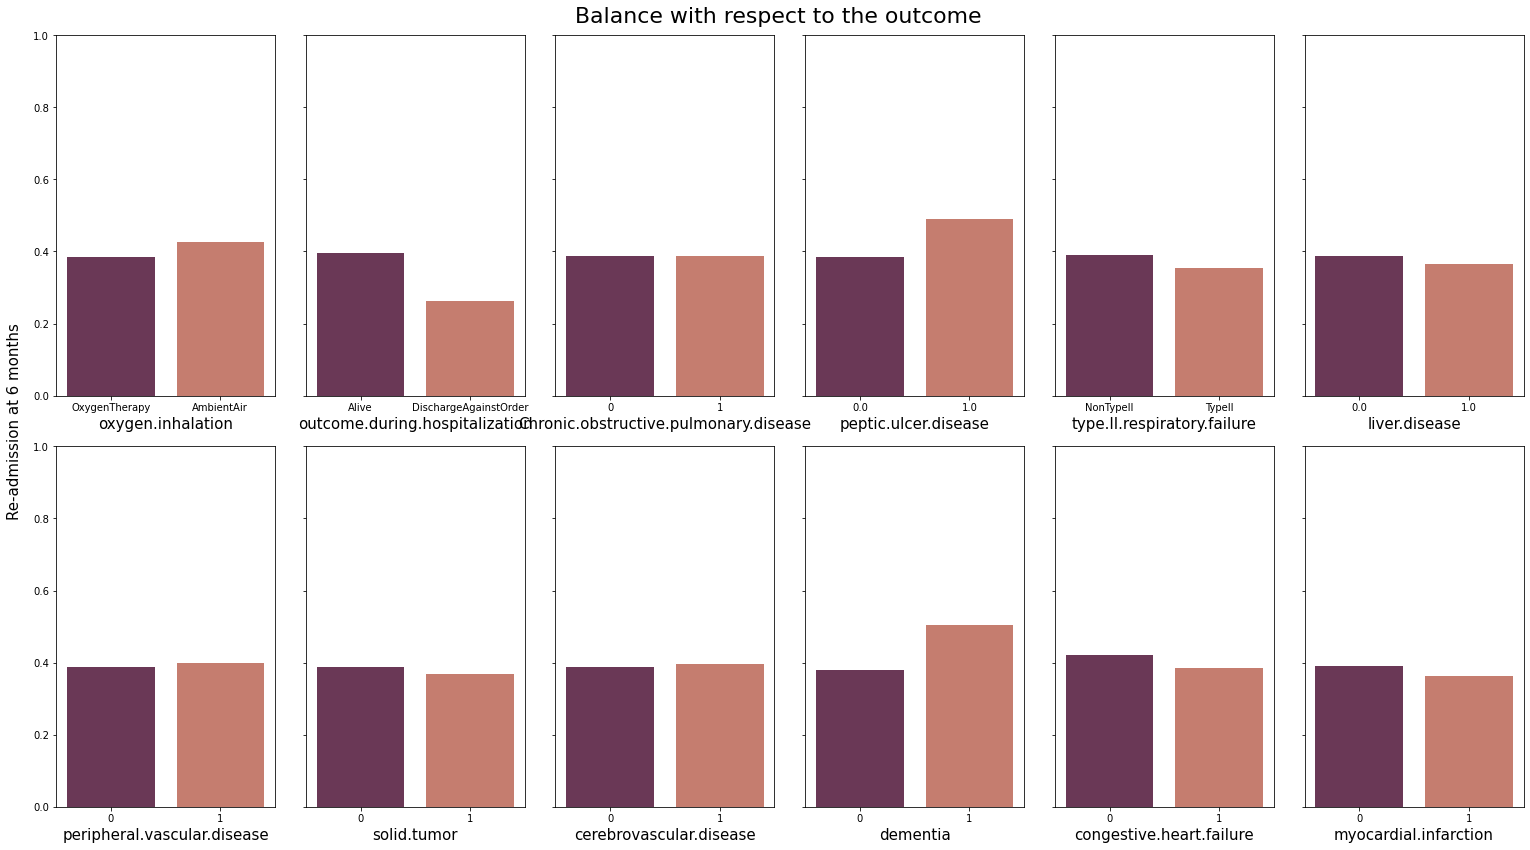

In [16]:
group2 = list(set(unbalanced_cols) - set(group1))

fig, axes = plt.subplots(2,6,sharey=True, figsize=(21,12))
fig.text(-0.01, 0.5, 'Re-admission at 6 months', va='center', rotation='vertical', size = 15)
fig.suptitle('Balance with respect to the outcome', size = 22)

idx = 0
i = 0
for column_name in group2:
    
    sns.barplot(ax=axes[i,idx], x=column_name, y= outcome_name,
                data=data, saturation=.5, ci=None, palette='rocket')
    axes[i,idx].set_ylabel('')
    axes[i,idx].set_xlabel(column_name, size = 15)
    idx += 1
    if idx == 6:
        idx = 0
        i += 1
        
plt.ylim([0,1])
fig.tight_layout()
plt.show()

We can see that all the binary variables have a balanced proportion of values in their categories corresponding to the outcome class. Thus, we can think of removing these variables from the study.

In [18]:
balanced_in_outcome.extend(group2)

In [20]:
len(balanced_in_outcome)

15